# 4 Neural Networks

Follow through the notebook to see an implementation of a neural network using SkLearn and a cost analysis of this method.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Pre-Processing Data

First, we want to examine the given dataset with wine quality ratings, for both white and red wine.

The white wine dataset is 4898 rows for each bottle of wine, with 12 columns for various fields such as fixed acidity, pH, sulphates, alcohol, and an overall quality rating.

In [23]:
#load and examine the raw contents of the dataset
white_wine = pd.read_csv('winequality-white.csv', sep=';')
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


To better understand the data and its various fields, we check to see that all columns are filled out and that there is no missing data.

In [3]:
#check to see if there are missing values from the data
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


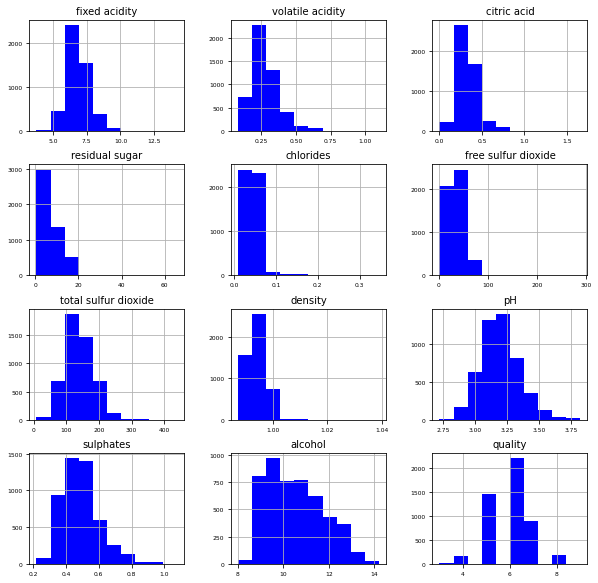

In [5]:
#since there is no data loss, see what the relations are
fig = white_wine.hist(figsize=(10,10), color='blue', xlabelsize=6, ylabelsize=6)
[x.title.set_size(10) for x in fig.ravel()]
plt.show()

It looks like there is no missing data from the white wine dataset and the distribution of the column vectors show pH, sulphates, and alcohol show influence the quality of white wine.

Let us load the red wine dataset to compare and predict quality ratings.

In [22]:
red_wine = pd.read_csv('winequality-red.csv', sep=';')
red_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [8]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


The distribution of red wine across various fields seems similar to white wine. We further process the data by setting white wine to 0 and red to 1 to distinguish the ratings.

We set up the x, y values for processing and begin by splitting data to train and test the model.

In [9]:
white_wine['type'] = 0
red_wine['type'] = 1

wines = red_wine.append(white_wine, ignore_index=True)

x = wines.iloc[:, 0:11]
y = np.ravel(wines.type)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
           x, y, test_size = 0.34, random_state = 45)

## Model Implementation

Now we add layers to the sequential model using the Keras activation arguments, with 2 layers set to 'relu', or recified linear unit activation function and the third layer activated by the sigmoid function. 

In [24]:
from keras.models import Sequential
from keras.layers import Dense

#initialize the layers
model = Sequential()
model.add(Dense(4, activation ='relu', input_shape =(11, )))
model.add(Dense(3, activation ='relu'))
model.add(Dense(1, activation ='sigmoid'))

#print related info
model.output_shape
model.summary()
model.get_config()
 
# List the weight tensors
model.get_weights()
model.compile(loss ='binary_crossentropy',
  optimizer ='adam', metrics =['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 4)                 48        
                                                                 
 dense_4 (Dense)             (None, 3)                 15        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


Here you can see that all the inputs will be used by the model and next we build the model that creates the fitting for the computations of a neural network (Takes about 1 min).

In [25]:
pred = model.fit(X_train, y_train, epochs = 30,
           batch_size = 1, verbose = 2)
  
# Predicting the Value
y_pred = model.predict(X_test)

Epoch 1/30
4288/4288 - 4s - loss: 0.3000 - accuracy: 0.9049 - 4s/epoch - 874us/step
Epoch 2/30
4288/4288 - 3s - loss: 0.2304 - accuracy: 0.9345 - 3s/epoch - 816us/step
Epoch 3/30
4288/4288 - 7s - loss: 0.2046 - accuracy: 0.9398 - 7s/epoch - 2ms/step
Epoch 4/30
4288/4288 - 3s - loss: 0.1766 - accuracy: 0.9457 - 3s/epoch - 813us/step
Epoch 5/30
4288/4288 - 3s - loss: 0.1508 - accuracy: 0.9545 - 3s/epoch - 809us/step
Epoch 6/30
4288/4288 - 3s - loss: 0.1336 - accuracy: 0.9615 - 3s/epoch - 802us/step
Epoch 7/30
4288/4288 - 3s - loss: 0.1230 - accuracy: 0.9618 - 3s/epoch - 809us/step
Epoch 8/30
4288/4288 - 3s - loss: 0.1159 - accuracy: 0.9678 - 3s/epoch - 805us/step
Epoch 9/30
4288/4288 - 3s - loss: 0.1098 - accuracy: 0.9692 - 3s/epoch - 811us/step
Epoch 10/30
4288/4288 - 3s - loss: 0.1050 - accuracy: 0.9681 - 3s/epoch - 812us/step
Epoch 11/30
4288/4288 - 4s - loss: 0.1011 - accuracy: 0.9708 - 4s/epoch - 843us/step
Epoch 12/30
4288/4288 - 3s - loss: 0.0971 - accuracy: 0.9718 - 3s/epoch - 80

## Testing

In order to confirm that the model works as expected, we first compare elements from the predicted values and confirm them to the actual values. In doing so, we compare the y_pred variable to the y_test variable.

In [26]:
print(np.round_(y_pred[200]))

[1.]


In [27]:
print(y_test[200])

1


When testing a few values, we are accurately identifying which wine type, white (0) or red (1), is better when considering the alcohol content.

Below, we can plot the error rate/loss and accuracy using SkLearn's tools. We can see that the SkLearn model is an appropriate method in which to conduct Neural Networks.

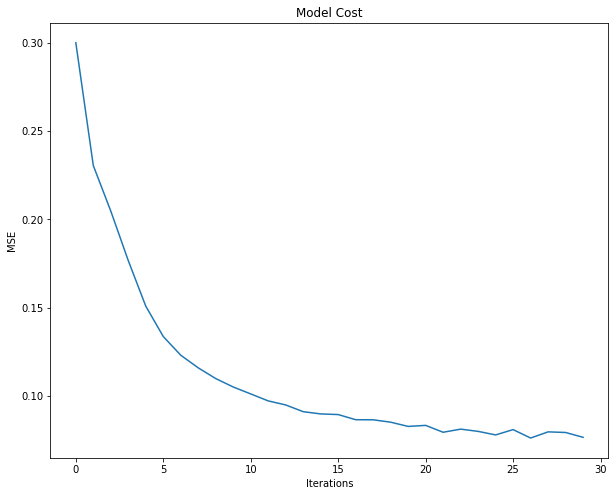

In [28]:
#plot the model behavior for loss over the 30 iterations
plt.figure(figsize = (10, 8))
plt.plot(pred.history['loss'])
plt.title('Model Cost')
plt.ylabel('MSE')
plt.xlabel('Iterations')
plt.show()

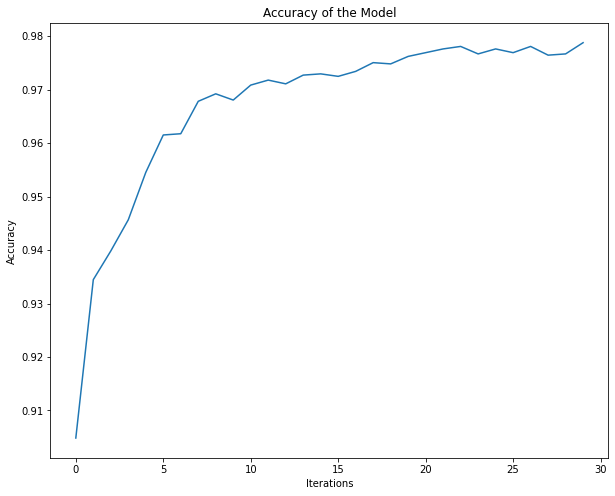

In [29]:
#plot the model behavior of accuracy over time
plt.figure(figsize = (10, 8))
plt.plot(pred.history['accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.show()